In [3]:
%autosave 60

Autosaving every 60 seconds


In [36]:
# data analysis
import pandas as pd

# math & plotting
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

# data format
import datetime as dt

Analysis
---------

Some statistic analaysis of these structures.

In [43]:
filepath = "../datasets/PDB_Data_Distribution_by_Resolution.csv"
histopdb = pd.read_csv(filepath, 
                       names=["resolution", "entries"], 
                       comment='#')

# ignore extreme resolution values 
dr = histopdb.resolution.iloc[1:-1].astype('float64')
de = histopdb.entries.iloc[1:-1]
# generate syntetic dataset for boxplot
k = 0
pdb = []
for i in de:
    for j in range(i):
        pdb.append(dr.iloc[k])
    k += 1

In [64]:
# load data
path = "../datasets/PDB_H+Cl_exchange_transporters.csv"
data = pd.read_csv(path)

# convert string to datatime
data.deposition_date = pd.to_datetime(data.deposition_date, 
                                      format='%Y-%m-%d')

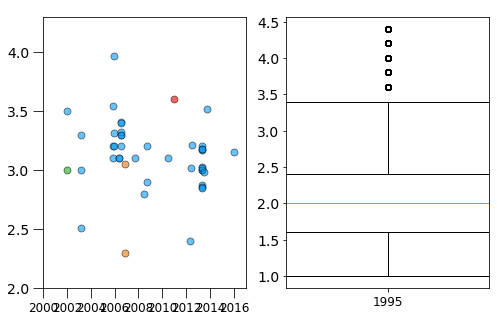

In [70]:
# Plot canvas
fig, axes = plt.subplots(1, 2, figsize=(8,5))

# global parameters
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=14)

# palette
count = 0
palet = ['xkcd:azure', 
         'xkcd:green', 
         'xkcd:orange', 
         'xkcd:red']

# gene_name unique values
genes = data.gene_name.unique()

# plot graph
ax = axes [0]
for name in genes:
    subs = data[data.gene_name == name]
    ax.plot_date(subs.deposition_date, 
                  subs.resolution,
                  mec   = 'k',
                  mew   = 0.75,
                  ms    = 7,
                  alpha = 0.6,
                  color = palet[count])
    count += 1

# customize
ax.tick_params(size=10)
ax.set_ylim([2.0, 4.3])
ax.set_xlim([dt.date(2000, 1, 1), 
             dt.date(2017, 1, 1)])

# save label and tick positions
# plt.draw()
# locs = ax.get_xticks()
# labs = ax.get_xticklabels()

ac = axes[1]
# boxplot
d = ['1998']
x = [locs[1]-400]
s = dict(markersize=6)
ac.boxplot(data.resolution,
            positions = x,
            widths = 210,
            labels = d,
            flierprops=s)

d = ['1995']
x = [locs[1]-800]
ac.boxplot(pdb,
            positions = x,
            widths = 210,
            labels = d)

# Reset the xtick locations.
#ax.set_xticks(locs)
#ax.set_xticklabels(labs)

# show
plt.show()